# handling imbalanced dataset

In [1]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
#importing (imbalanced) data
df=pd.read_csv("temporary/df_proc_train_set.csv",index_col="smiles")
df.drop(["Id"], axis=1, inplace=True)
df.head()


,sol_category,ecfp_0,ecfp_1,ecfp_2,ecfp_3,ecfp_4,ecfp_5,ecfp_6,ecfp_7,ecfp_8,...,rdkit_desc_fr_quatN,rdkit_desc_fr_sulfide,rdkit_desc_fr_sulfonamd,rdkit_desc_fr_sulfone,rdkit_desc_fr_term_acetylene,rdkit_desc_fr_tetrazole,rdkit_desc_fr_thiazole,rdkit_desc_fr_thiophene,rdkit_desc_fr_unbrch_alkane,rdkit_desc_fr_urea
smiles,,,,,,,,,,,,,,,,,,,,,
Cc1nc(N2CCN(C(=O)Nc3ccc(F)cc3F)CC2)cc(-n2ccnc2)n1,0.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
CCN(CC)[C@H]1CCN(C(=O)Cc2nc(C(C)C)c(C)s2)C1,0.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
CNC(=O)CNC(=O)c1c(-n2cccc2)sc(C)c1C,0.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
CC(C)(C)c1ccc(CSc2cnn(C(C)(C)C)c(=O)c2Cl)cc1,0.0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CC[C@H](NC(=O)c1ccnc(-n2ccnc2)c1)c1ccccc1OC,0.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#define y as label and x as features from dataframe
x=df.drop(["sol_category"], axis=1)
y=df["sol_category"]

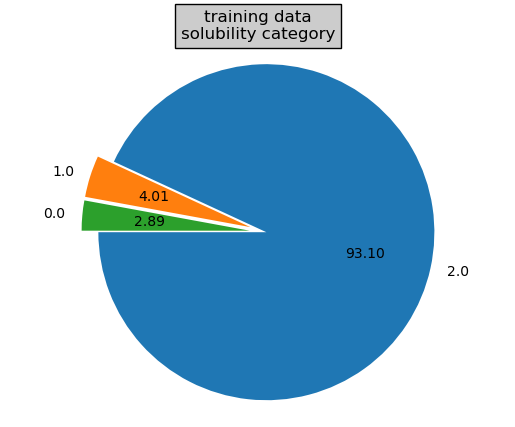

In [4]:
def make_pie(y):
    explode = (0.0, 0.1, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(y.value_counts(), explode=explode, autopct="%.2f", labels=y.value_counts().index, startangle=180)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title("training data\n" + "solubility category", bbox={'facecolor':'0.8', 'pad':4})
    plt.show

make_pie(y)


In [5]:
x_train_0, x_test_0, y_train_0, y_test_0=train_test_split(x,y,test_size=6/7, random_state=12)

print(y_train_0.value_counts(normalize=True))
print(y_test_0.value_counts(normalize=True))

2.0    0.929116
1.0    0.041283
0.0    0.029601
Name: sol_category, dtype: float64
2.0    0.931364
1.0    0.039894
0.0    0.028741
Name: sol_category, dtype: float64


# transform into stratified train and test split
### retain same ratio of classes in both train and test set

In [6]:

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=1/7, random_state=12, stratify=y) #6/7 before
y_train
print(y_train.value_counts())
print(y_test.value_counts())
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

2.0    56430
1.0     2430
0.0     1749
Name: sol_category, dtype: int64
2.0    9405
1.0     405
0.0     292
Name: sol_category, dtype: int64
2.0    0.931050
1.0    0.040093
0.0    0.028857
Name: sol_category, dtype: float64
2.0    0.931004
1.0    0.040091
0.0    0.028905
Name: sol_category, dtype: float64


In [7]:
'''
x_train, x_test, y_train, y_test=train_test_split(x_train,y_train,test_size=0.5, random_state=12, stratify=y_train)
y_train
print(y_train.value_counts())
print(y_test.value_counts())
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))
'''

'\nx_train, x_test, y_train, y_test=train_test_split(x_train,y_train,test_size=0.5, random_state=12, stratify=y_train)\ny_train\nprint(y_train.value_counts())\nprint(y_test.value_counts())\nprint(y_train.value_counts(normalize=True))\nprint(y_test.value_counts(normalize=True))\n'

In [8]:
type(y_train[1])

numpy.float64

# grid search to find optimal hyper parameters for

##### svc: svm.LinearSVC,
##### random forest classifier: ensemble.RandomForestClassifier,
##### fnn: neural_network.MLPClassifier,
##### xgboost: XGClassifier,
##### logistic regression: sklearn.linear_model.LogisticRegression



In [2]:
import warnings
warnings.filterwarnings('ignore')

import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats
from sklearn.metrics import mean_squared_error

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline #first transform then estimate data
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier


from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from scipy.stats import pearsonr
from sklearn.metrics import cohen_kappa_score

from sklearn.linear_model import LogisticRegression
from numpy import linspace

from xgboost import XGBRegressor

In [11]:

feature_sets = {
    'MorganFP': df.columns[pd.Series(df.columns).str.startswith('ecfp_')],
    'RDKit': df.columns[pd.Series(df.columns).str.startswith('rdkit_desc')],
    'ExampleDescriptors': df.columns[pd.Series(df.columns).str.startswith('example_')],
}

In [12]:
estimators = {

    'nn': MLPClassifier(),

    'xgb': XGBClassifier(),

    'rf': RandomForestClassifier(),
    
    'lg': LogisticRegression()
}

params = {
    'rf': {
        'rf__n_estimators': np.arange(50, 1050, 50),
        'rf__max_features': np.arange(0.1, 1.0, 0.1)
    },
    'nn': {
        'nn__hidden_layer_sizes': [(n,) for n in np.arange(5, 200, 5)],
        'nn__activation': ['tanh', "relu"],
        'nn__alpha': 10.0 ** -np.arange(1, 7),
        'nn__max_iter': [500, 1000],
        'nn__batch_size': [200] #now it only uses 6 batches for whole dataset
    },


    'xgb': {
        'xgb__learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
        'xgb__max_depth': np.arange(1, 11, 2),
        'xgb__n_estimators': np.arange(50, 550, 50),
        'xgb__subsample': [0.5, 1]
    },

    'lg': {
        'max_iter' : range(1000, 2000),
        'solver' : ['newton-cg', 'lbfgs', 'sag', 'saga'],
        'penalty' : ['l2', 'none'],
        'C' : linspace(0.1, 1.0, num=50)
    }
}

In [13]:

best_params = {}
cv_scores = {}
test_score = {}


for f in tqdm(feature_sets): #tqdm for progress bar
    
    print(f'Using {f} features...')

    features = x

    best_params[f] = {} #each value is another dictonary 
    cv_scores[f] = {}
    test_score[f] = {}

    for e in tqdm(estimators):

        print(f'\tRandom search optimisation for {e} estimator...') #n_iter: number hyperparameter setting, normally 100
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42).split(x_train, y_train)
        pipe = Pipeline([('scaler', StandardScaler()), (e, estimators[e])])
        model = RandomizedSearchCV(pipe, param_distributions=params[e], cv=cv, refit=True, n_iter=5, n_jobs=64, verbose=2, random_state=42).fit(x_train, y_train) # verbose=1: information on hyperparameter search
        #cv_score[e] = model.best_score_


        #have best parameters in model.best_estimator_
        # get pearson correlation for each cv fold
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42).split(x_train, y_train)
        scores = cross_val_score(model.best_estimator_, x_train, y_train, cv=cv)
        cv_scores[f][e] = [s**0.5 for s in scores] # convert r-squared to pearsonr #t2 keys?

        best_params[f][e] = model.best_params_

        #test model on test set and get scores:
        test_score[f][e] = {}
        
        pred = model.predict(x_test)
        rp = cohen_kappa_score(y_test, pred, weights="quadratic")
        test_score[f][e] = rp

  0%|          | 0/3 [00:00<?, ?it/s]

Using MorganFP features...


	Random search optimisation for nn estimator...
Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [ ]:
test_score

{'MorganFP': {'nn': 0.031325467467053,
  'xgb': 0.08576869724684366,
  'rf': 0.09442629393991508},
 'RDKit': {'nn': 0.014716335204607023,
  'xgb': 0.08576869724684366,
  'rf': 0.09442629393991508},
 'ExampleDescriptors': {'nn': 0.033169825427933675,
  'xgb': 0.08576869724684366,
  'rf': 0.09442629393991508}}

In [ ]:
y_test

smiles
Cc1c(NC(=O)N2CCC[C@@H]2Cc2ccccc2)c(=O)n(-c2ccccc2)n1C                2.0
COc1cnccc1[C@H](C)NC(=O)Nc1ccc(C)c(OCC(F)F)c1                        2.0
CNC[C@H]1CCN(S(=O)(=O)c2ccc(F)c(F)c2)C1                              2.0
O=C(COc1ccccc1)Nn1ccc2c(cnc3ccnn32)c1=O                              2.0
O=C(O)c1cc2ccccc2[nH]1                                               2.0
                                                                    ... 
CC(C)C1NC(=O)c2ccccc2N(CC(=O)Nc2nc3c(s2)CCC3)C1=O                    2.0
O=C(CCn1cncn1)N[C@@H]1C[C@H]1c1cccc2ccccc12                          2.0
Cc1cc(C)n([C@H]2CCCN(C(=O)CCCc3ccccn3)C2)n1                          2.0
O=C(CCc1ccccc1)N1CCC(NC(=O)N2CCCCCO2)CC1                             2.0
O=C1NC(=O)[C@H](CCC(=O)N2CCN(S(=O)(=O)c3cc(C(F)(F)F)ccc3Cl)CC2)N1    2.0
Name: sol_category, Length: 505, dtype: float64

In [ ]:
pred

array([ 1.10729678e+00, -1.53160976e+00,  2.19249702e+00, -1.45842461e+00,
        4.04630096e-01, -4.51046171e-01,  3.32781191e-01,  1.28830132e+00,
        2.45927231e-01, -2.95759221e-01, -7.32299518e-01, -9.34985510e-02,
        1.19944722e+00,  1.01546551e+00,  1.64315472e+00,  7.34351842e-01,
        7.05139976e-01,  1.37194989e-01,  8.67826288e-01,  2.61550362e-01,
        9.92194550e-01,  7.83264447e-01, -7.83081139e-01,  5.26277478e-03,
       -1.16783292e+00,  8.59522634e-01, -9.70498559e-02,  8.48992654e-01,
       -9.24428387e-01,  2.64771932e-01,  1.91272108e+00,  5.27297211e-01,
       -4.47919275e-01,  1.53007167e+00,  1.62061960e+00, -3.04502751e-01,
       -5.94756705e-01,  1.30550111e+00,  4.26352779e-01, -5.96127518e-02,
        5.10560438e-01, -1.81178022e-01,  2.05428613e-01,  2.72122607e+00,
       -4.10305646e-01,  9.18529704e-01,  1.24214099e+00,  3.10336247e-01,
        1.32754022e+00,  7.21507388e-01,  6.54780575e-01,  7.17530293e-01,
       -3.15349600e-01, -

In [ ]:
#idd rausgelassen

In [ ]:
# JSON encoder for np.int64 #what is this part doing? return int of a number. if it cannot return error
def default(o):
    if isinstance(o, np.integer):
        return int(o)
    raise TypeError    

In [ ]:
#writing files for best parameters, cv scores 

In [4]:
with open('./results/random_search_best_params.json', 'w') as f:
    json.dump(best_params, f, default=default)
    
with open('./results/random_search_best_cv_scores.json', 'w') as f:
    json.dump(cv_scores, f, default=default) 

NameError: name 'best_params' is not defined

In [ ]:
with open('./results/random_search_best_cv_scores.json') as f:
    cv_scores = json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '../results/random_search_best_cv_scores.json'

In [ ]:
mean_cv_score = {f: {e: np.mean(cv_scores[f][e]) for e in cv_scores[f]} for f in cv_scores}

In [ ]:
row_order = ['RDKit', 'Vina', 'Vina + RDKit', 'RF-Score', 'RF-Score + RDKit', 'RF-Score v3', 'RF-Score v3 + RDKit', 'NNScore 2.0', 'NNScore 2.0 + RDKit']
column_order = ['Linear', 'Neural Network', 'AdaBoost', 'Gradient Boosting', 'XGBoost', 'Random Forest']
mapper = {
    'enet': 'Linear',
    'ab': 'AdaBoost',
    'gb': 'Gradient Boosting',
    'xgb': 'XGBoost',
    'rf': 'Random Forest',
    'nn': 'Neural Network',
}
df = pd.DataFrame(mean_cv_score).T
df = df.rename(mapper=mapper, axis='columns')
df = df.loc[row_order, column_order]
df = df.drop('Gradient Boosting', axis='columns')

fig, ax = plt.subplots(1,1,figsize=(6,6))
sns.heatmap(df, annot=True, cmap='viridis', cbar_kws={'label': r"Mean Pearson Correlation Coefficient"}, ax=ax)
ax.set_xlabel('Algorithm')
ax.set_ylabel('Features Used')
ax.hlines([1, 3, 5, 7], *ax.get_xlim(), linestyle=':', linewidth=2)
fig.savefig('./figures/algorithm_comparison.jpg', dpi=350, bbox_inches='tight')